# Lab 4: Maximum Likelihood Estimate (MLE)

### Introduction

In this lab session we shall have a look at how to use the *Maximum Likelihood Estimate (MLE)* method to estimate the parameters of some model, given some observations $D$.

<font color="red">NOTE: </font>In the notation $\mathcal{N} (\mu, \sigma^2)$ $\mu$ refers to the mean and $\sigma^2$  the variance, not the standard deviation. The standard deviation is $\sigma = \sqrt {\sigma^2}$, i.e. for $\mathcal{N}(0.5, 0.25)$, the standard deviation is $\sigma = 0.5$.

As usual, let's import the libraries before we start by running the cell below.

In [2]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
from scipy import stats
# Necessary to import Axes3D to use `plt.subplots(subplot_kw={'projection': '3d'})`
# as this internally sets up matplotlib for 3D projection, without this import you'll 
# get an error.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# show matplotlib figures inline
%matplotlib inline

In [3]:
# By default we set figures to be 7"x4" on a 110 dots per inch (DPI) screen 
# (adjust DPI if you have a high res screen!)
plt.rc('figure', figsize=(7, 4), dpi=110)
plt.rc('font', size=10)

## MLE with Python

Here, We know want you to write a simple program that calculates $\mu_{\text{ML}}$ using Python.

Let's now load the data from the file `data1.dat` and let's plot the histogram of the data.

In [4]:
# write your code here

(array([2., 1., 5., 9., 8., 8., 8., 4., 2., 3.]),
 array([-0.34415 , -0.144065,  0.05602 ,  0.256105,  0.45619 ,  0.656275,
         0.85636 ,  1.056445,  1.25653 ,  1.456615,  1.6567  ]),
 <BarContainer object of 10 artists>)

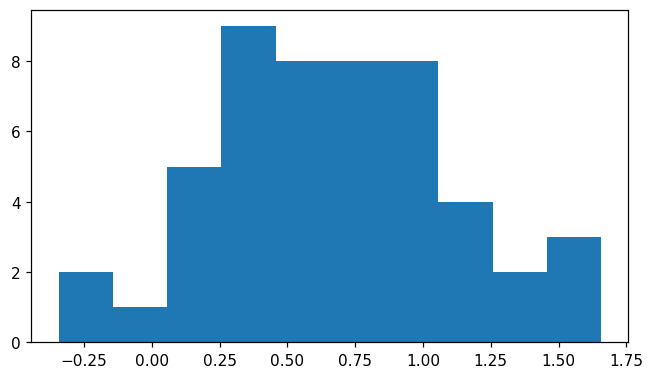

In [5]:
##CORRECT ANSWER##
D = np.loadtxt('data1.dat', delimiter=',')

plt.hist(D)
##CORRECT ANSWER##

You should now see a histogram approximating a normal distribution. In fact, `data1.data` contains the observations $D$ we talked about above when deriving $\mu_\text{ML}$, which we said we believe follows a normal distribution. 

Write a function `compute_likelihood(D, mu)` that takes a value of $\mu$ and computes $p(D | \mu)$ for the data in `data1.dat`, assuming $\sigma=0.5$.

You may use NumPy's function `np.prod` for the calculation.

In [6]:
# write your code here

In [7]:
##CORRECT ANSWER##
def compute_likelihood(data, mu, sigma=0.5):
    pdf = stats.norm.pdf(data, loc=mu, scale=sigma)
    likelihood = pdf.prod()
    
    return likelihood

compute_likelihood(D, 0.5)
##CORRECT ANSWER##

2.1613853049710207e-15

Write a function `loop_likelihood(D)` that calls `compute_likelihood` for each value of $\mu \in \{0.00, 0.01, 0.02, \ldots , 1.00\}$, storing *both* the value of $\mu$ and the corresponding obtained likelihood in a 2D array so that the first column contains the value $\mu$ and the second the likelihood $p(D|\mu)$ .

In [8]:
# write your code here

In [9]:
##CORRECT ANSWER##
def loop_likelihood(data, size=101):
    L = np.zeros(shape=(size, 2))
    
    for i, mu in enumerate(np.linspace(0, 1, size)):
        likelihood = compute_likelihood(data, mu)
        L[i, :] = (mu, likelihood)
        
    return L


loop_likelihood(D)
##CORRECT ANSWER##

array([[0.00000000e+00, 8.13741147e-34],
       [1.00000000e-02, 3.10295510e-33],
       [2.00000000e-02, 1.15978855e-32],
       [3.00000000e-02, 4.24909314e-32],
       [4.00000000e-02, 1.52590606e-31],
       [5.00000000e-02, 5.37122633e-31],
       [6.00000000e-02, 1.85324663e-30],
       [7.00000000e-02, 6.26768405e-30],
       [8.00000000e-02, 2.07775857e-29],
       [9.00000000e-02, 6.75145193e-29],
       [1.00000000e-01, 2.15037097e-28],
       [1.10000000e-01, 6.71341827e-28],
       [1.20000000e-01, 2.05441480e-27],
       [1.30000000e-01, 6.16235443e-27],
       [1.40000000e-01, 1.81183783e-26],
       [1.50000000e-01, 5.22162984e-26],
       [1.60000000e-01, 1.47505071e-25],
       [1.70000000e-01, 4.08434042e-25],
       [1.80000000e-01, 1.10853912e-24],
       [1.90000000e-01, 2.94913208e-24],
       [2.00000000e-01, 7.69044614e-24],
       [2.10000000e-01, 1.96572589e-23],
       [2.20000000e-01, 4.92502556e-23],
       [2.30000000e-01, 1.20950629e-22],
       [2.400000

### Questions:

- What is the value of the maximum likelihood $\text{ML} = \max p(D|\mu)$ ? 

- What is $\mu_{\text{ML}} = arg\,max_\mu \, p(D|\mu)$? 

Make sure you understand the difference between the two.

In [10]:
# write your code here

In [11]:
##CORRECT ANSWER##
L = loop_likelihood(D)
max_ml_index = L[:, 1].argmax() # second column contains likelihoods
arg_max_ml, max_ml = L[max_ml_index, :]

print('mu_ml =', arg_max_ml)
print('ml =', max_ml)
##CORRECT ANSWER##

mu_ml = 0.67
ml = 4.491192371239748e-14


### Visual interpretation

Look at the obtained $\mu_{\text{ML}}$ and at the previously plotted histogram. Can you see any relationship between the obtained value and the histogram?

Let's now plot $\mu$ against $p(D|\mu)$, using the $\mu$ values you used to compute the likelihoods. Plot also a vertical line located at $\mu_{\text{ML}}$. Where does this line lie? Is it a meaningful position?

In [12]:
# write your code here

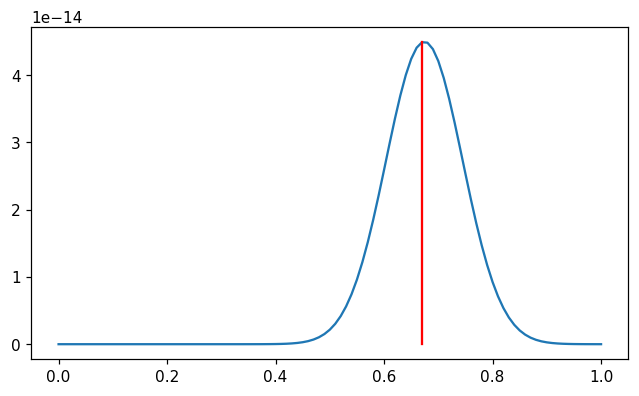

In [13]:
##CORRECT ANSWER##
# plot mu against p(D|mu) 
fig, ax = plt.subplots()
ax.plot(L[:, 0], L[:, 1]) 
# plot a vertical line to show arg max(P(D|mu))
xs = (L[max_ml_index, 0], L[max_ml_index, 0])
ys = (0, L[max_ml_index, 1])
ax.plot(xs, ys, color='r' )
##CORRECT ANSWER##

The line is at the maximum value of $p(D|\mu)$.

### Comparison with MLE recipe

Now implement the analytic MLE result, $\mu_\text{ML} = \frac{1}{n}\sum_i d_i$, to find the value of $\mu_{ML}$ (note that this should be just one line of code!).

Compare this value with that obtained previously. Do the values match? 

In [14]:
# write your code here

In [15]:
##CORRECT ANSWER##
print('mu_ml =', arg_max_ml)
print('mu_ml with MLE recipe (data mean) =', D.sum() / len(D))
##CORRECT ANSWER##

mu_ml = 0.67
mu_ml with MLE recipe (data mean) = 0.6742339399999999


### CORRECT ANSWER

By using the MLE recipe we found that the parameter $\mu$ maximising the likelihood was given by the mean of the data points $D$. 

In fact, the mean of $D$ corresponds to the previously obtained $\mu_{\text{ML}} = argmax_\mu P(D|\mu)$, which was $0.67$.